> **date** : Ngày bán nhà
> 
> **price** : Giá nhà giao dịch
> 
> **bedrooms** : Số phòng ngủ trong nhà
> 
> **bathrooms** : Số phòng tắm trong nhà
> 
> **sqft_living** : Diện tích ngôi nhà 
> 
> **sqft_lot**: Diện tích lô
> 
> **floors** : Số tầng của ngôi nhà
> 
> **waterfront** : Ngôi nhà gần bờ sông
> 
> **view** : Ngôi nhà đã được xem
> 
> **condition** : Mức độ tình trạng tổng thể của ngôi nhà
> 
> **sqft_above** : Diện tích ngôi nhà (trừ tầng hầm)
> 
> **sqft_basement** : Diện tích tầng hầm
> 
> **yr_built** : Năm xây dựng
> 
> **yr_renovated** : Năm ngôi nhà được cải tạo



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path_file = "House-Price.csv"
data = pd.read_csv(path_file)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0.00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0.00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0.00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0.00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0.00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
data.shape

(4600, 18)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [7]:
data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [8]:
data['age'] = 2021 - data['yr_built']
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
0,02-05-2014 0.00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,66
1,02-05-2014 0.00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,100
2,02-05-2014 0.00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,55
3,02-05-2014 0.00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,58
4,02-05-2014 0.00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,45


In [9]:
data = data.drop(['date','country','street','statezip'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,age
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,66
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,100
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,55
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,58
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,45


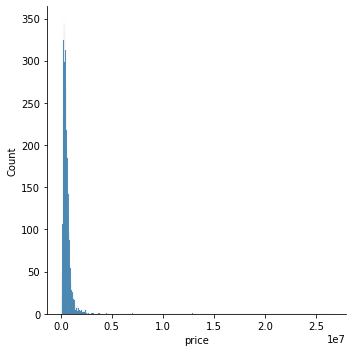

In [10]:
sns.displot(data['price'])

In [11]:
print("Skewness: %.2f" % data['price'].skew())
print("Kurtosis: %.2f" % data['price'].kurt())

Skewness: 24.79
Kurtosis: 1044.35


In [12]:
def plot_boxplot(data, column):
    outlier = [column]
    plt.figure(figsize = (10, 8))
    sns.set_style("whitegrid")
    sns.boxplot(data = data[outlier], orient = "v", palette = "Set3", saturation = 1, whis = 1.5, width = 0.9);
    plt.title("Outier Variable Distribution", fontweight = "bold", fontsize = 15)
    plt.ylabel("Price Range", fontweight = "bold")

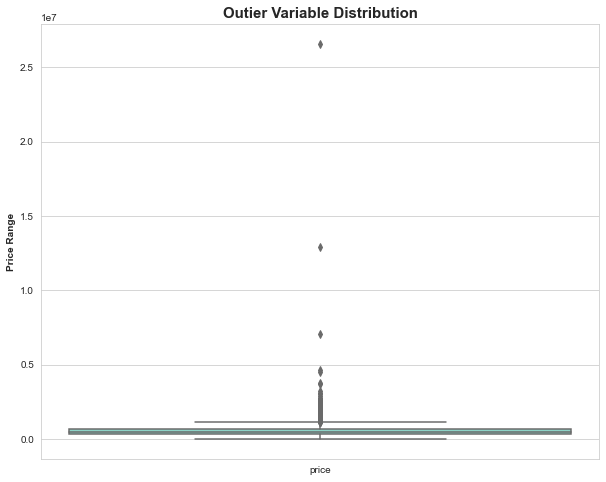

In [13]:
plot_boxplot(data,'price')

In [14]:
def outlier(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = data.index[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    return ls

In [15]:
index_list = []
for feature in ["price"]:
    index_list.extend(outlier(data, feature))
index_list

[1,
 11,
 14,
 99,
 122,
 133,
 193,
 201,
 217,
 227,
 252,
 284,
 285,
 309,
 356,
 359,
 366,
 373,
 404,
 414,
 418,
 452,
 462,
 471,
 478,
 482,
 488,
 524,
 525,
 534,
 537,
 564,
 581,
 603,
 606,
 611,
 650,
 704,
 734,
 745,
 839,
 847,
 862,
 880,
 927,
 965,
 970,
 979,
 995,
 1010,
 1056,
 1077,
 1107,
 1127,
 1128,
 1132,
 1143,
 1176,
 1186,
 1209,
 1258,
 1268,
 1275,
 1301,
 1302,
 1337,
 1345,
 1355,
 1369,
 1386,
 1411,
 1436,
 1464,
 1468,
 1470,
 1500,
 1518,
 1543,
 1567,
 1571,
 1584,
 1600,
 1602,
 1617,
 1629,
 1636,
 1637,
 1660,
 1662,
 1675,
 1690,
 1813,
 1837,
 1848,
 1858,
 1911,
 1951,
 1974,
 2005,
 2030,
 2040,
 2061,
 2083,
 2093,
 2094,
 2108,
 2109,
 2139,
 2186,
 2206,
 2226,
 2250,
 2286,
 2328,
 2333,
 2357,
 2361,
 2364,
 2389,
 2401,
 2412,
 2434,
 2454,
 2495,
 2500,
 2533,
 2584,
 2607,
 2654,
 2670,
 2672,
 2699,
 2705,
 2711,
 2712,
 2713,
 2724,
 2725,
 2728,
 2731,
 2761,
 2767,
 2772,
 2786,
 2815,
 2825,
 2837,
 2841,
 2846,
 2858,
 288

In [16]:
def remove(data, ls):
    
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data

In [17]:
data_cleaned = remove(data,index_list)
data_cleaned.shape

(4360, 15)

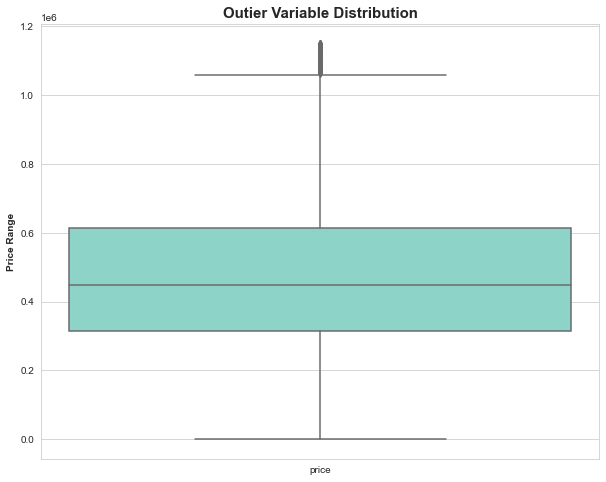

In [18]:
plot_boxplot(data_cleaned, 'price')

In [19]:
data_cleaned['price'].to_frame().sort_values(by = 'price',ascending = True)

,price
4358,0.0
4374,0.0
4487,0.0
4362,0.0
4361,0.0
...,...
233,1150000.0
2031,1150000.0
3946,1150000.0
1182,1150000.0


In [20]:
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned["price"] < 10000].index)
data_cleaned["price"].to_frame().sort_values(by = "price", ascending = True)

,price
1219,80000.0
1587,83000.0
4407,83300.0
4415,83300.0
4345,84350.0
...,...
3358,1150000.0
2031,1150000.0
3720,1150000.0
4082,1150000.0


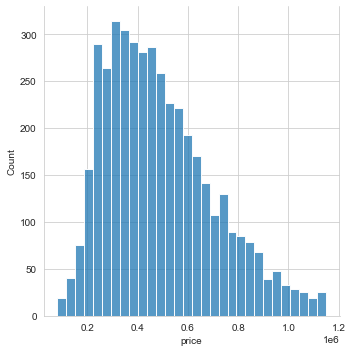

In [23]:
sns.displot(data_cleaned['price'])

In [24]:
print("Skewness: %f" % data_cleaned['price'].skew())
print("Kurtosis: %f" % data_cleaned['price'].kurt())

Skewness: 0.729912
Kurtosis: 0.035749


In [25]:
data_cleaned["city"].value_counts(normalize = True)

Seattle                0.338979
Renton                 0.067517
Bellevue               0.053828
Redmond                0.052668
Kent                   0.042459
Issaquah               0.042459
Kirkland               0.040835
Auburn                 0.040603
Sammamish              0.038515
Federal Way            0.033643
Shoreline              0.028074
Woodinville            0.025754
Maple Valley           0.022042
Burien                 0.016705
Snoqualmie             0.016009
Kenmore                0.015081
Des Moines             0.013457
Mercer Island          0.011601
North Bend             0.011601
Duvall                 0.009745
Covington              0.009513
Lake Forest Park       0.007889
Bothell                0.007657
Newcastle              0.007193
Vashon                 0.006729
SeaTac                 0.006497
Enumclaw               0.006265
Tukwila                0.006265
Carnation              0.004872
Normandy Park          0.003712
Fall City              0.002088
Black Di

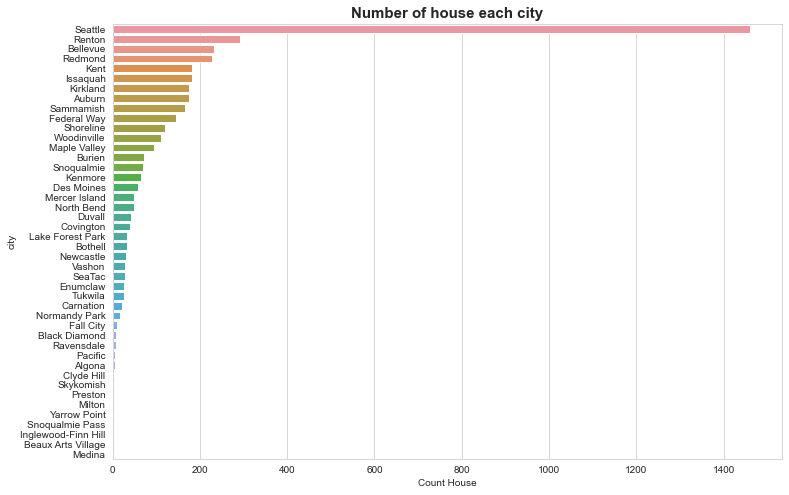

In [26]:
plt.figure(figsize = (12, 8))
sns.set_style("whitegrid")
sns.countplot(y = "city",
              data = data_cleaned,
              order = data_cleaned["city"].value_counts().index)
plt.xlabel("Count House")
plt.title("Number of house each city", fontweight = "bold", fontsize = 15)
plt.show()

In [27]:
data_cleaned['floors'].value_counts().to_frame()

,floors
1.0,2105
2.0,1640
1.5,415
3.0,120
2.5,28
3.5,2


In [28]:
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned["floors"] > 2].index)
# data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned["price"] < 10000].index)
data_cleaned['floors'].value_counts().to_frame().index

Float64Index([1.0, 2.0, 1.5], dtype='float64')

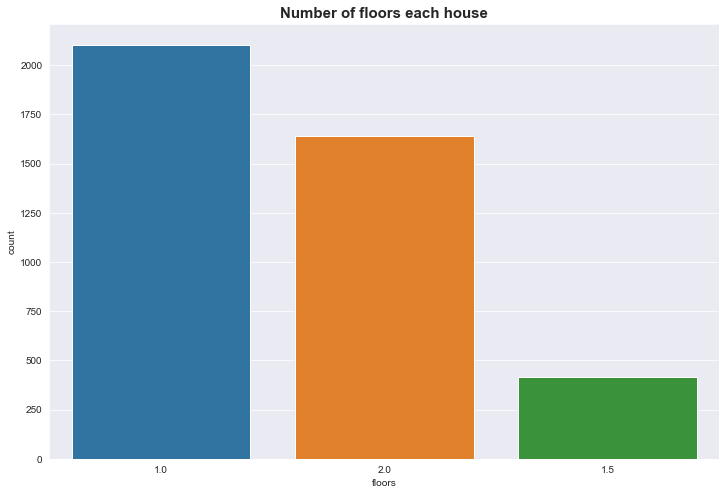

In [29]:
plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
sns.countplot(x = 'floors', 
              data = data_cleaned,
              order = data_cleaned['floors'].value_counts().to_frame().index)
plt.title("Number of floors each house", fontweight = 'bold', fontsize = 15)
plt.show()

In [30]:
data_cleaned['bedrooms'].value_counts().to_frame()

,bedrooms
3,1878
4,1376
2,538
5,277
6,44
1,36
7,10
8,1


In [31]:
data_cleaned.drop(data_cleaned[(data_cleaned['bedrooms'] > 5) | (data_cleaned['bedrooms'] == 1)].index, inplace = True)
data_cleaned['bedrooms'].value_counts().to_frame().index

Int64Index([3, 4, 2, 5], dtype='int64')

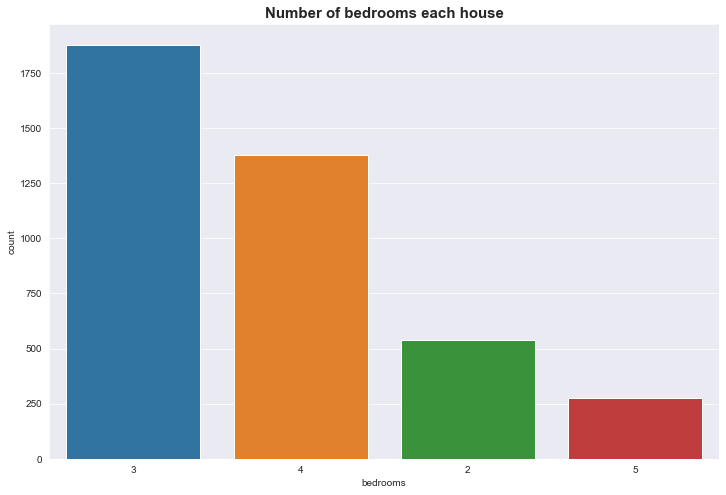

In [32]:
plt.figure(figsize = (12, 8))
sns.set_style("darkgrid")
sns.countplot(x = data_cleaned['bedrooms'],
              data = data_cleaned,
              order = data_cleaned['bedrooms'].value_counts().to_frame().index)
plt.title("Number of bedrooms each house", fontweight = 'bold', fontsize = 15)
plt.show()

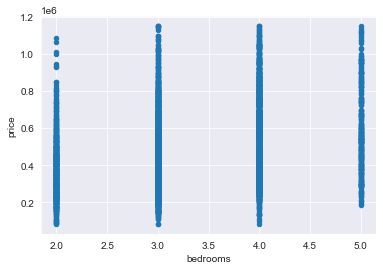

In [33]:
room = 'bedrooms'
datas = pd.concat([data_cleaned['price'],
                 data_cleaned[room]],
                 axis = 1)
datas.plot.scatter(x = room,
                  y = 'price');

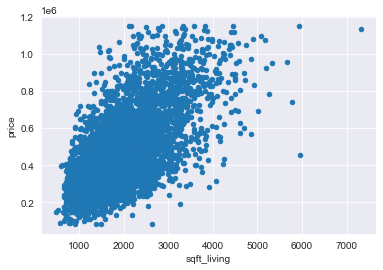

In [34]:
living = 'sqft_living'
datas = pd.concat([data_cleaned['price'],
                  data_cleaned[living]],
                 axis = 1)
datas.plot.scatter(x = living,
                  y = 'price');

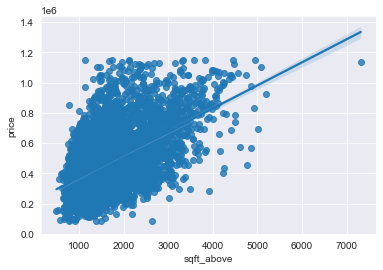

In [35]:
sns.regplot(x="sqft_above", y="price", data=data_cleaned)
plt.ylim(0,);

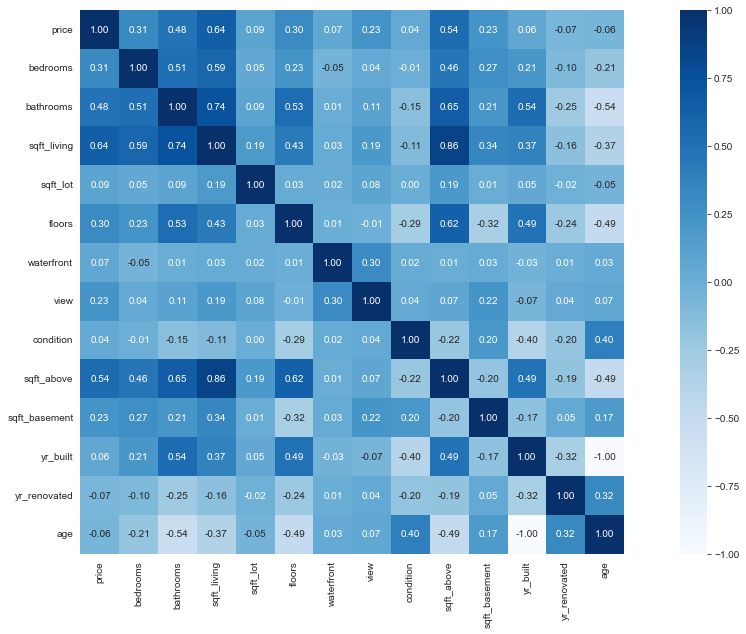

In [36]:
plt.figure(figsize = (20, 10))
sns.heatmap(data_cleaned.corr(), cbar = True, square = True, fmt = '.2f', annot = True, annot_kws = {'size': 10}, cmap = 'Blues');

In [37]:
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [38]:
data_cleaned.info

<bound method DataFrame.info of             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.0000         3       1.50         1340      7912     1.5   
2     342000.0000         3       2.00         1930     11947     1.0   
3     420000.0000         3       2.25         2000      8030     1.0   
4     550000.0000         4       2.50         1940     10500     1.0   
5     490000.0000         2       1.00          880      6380     1.0   
...           ...       ...        ...          ...       ...     ...   
4595  308166.6667         3       1.75         1510      6360     1.0   
4596  534333.3333         3       2.50         1460      7573     2.0   
4597  416904.1667         3       2.50         3010      7014     2.0   
4598  203400.0000         4       2.00         2090      6630     1.0   
4599  220600.0000         3       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0 

In [39]:
data_train = pd.get_dummies(data_cleaned)

In [40]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# data_cleaned['city'] = label_encoder.fit_transform(data_cleaned['city'])

In [41]:
from sklearn.model_selection import train_test_split
X = data_train.drop('price',axis=1).values
y = data_train['price'].values
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
# X_train = st.fit_transform(X_train)
# X_test = st.fit_transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
lin_reg.score(X_train,y_train)

0.7036687113258668

In [44]:
lin_reg.score(X_test,y_test)

0.7231675723604076

In [45]:
print_evaluate(y_test,lin_reg.predict(X_test))

MAE: 79851.33518452299
MSE: 12447824215.185839
RMSE: 111569.8176712046
R2 Square 0.7231675723604076


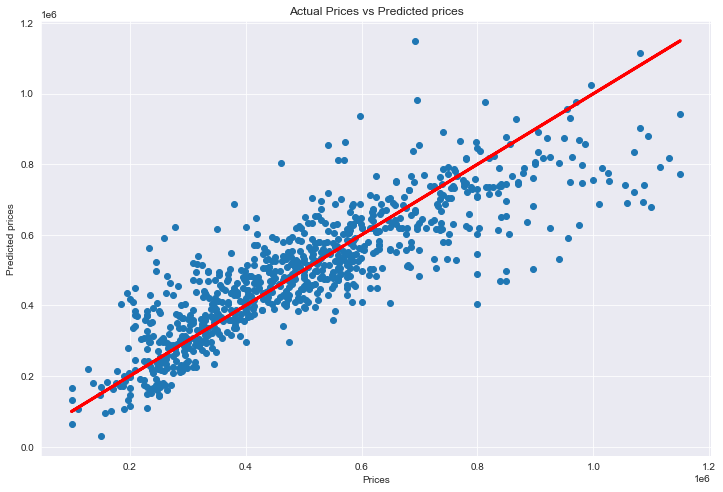

In [46]:
plt.figure(figsize = (12, 8))
plt.scatter(y_test, lin_reg.predict(X_test))
plt.plot(y_test, y_test,color='red', linewidth=3)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [47]:
lin_reg.coef_

array([-1.75547949e+04,  3.66928047e+04,  8.97480718e+01,  4.43813327e-02,
        2.19449158e+04,  1.13999020e+05,  3.87808251e+04,  2.88122753e+04,
        7.42495397e+01,  1.54986030e+01, -4.15316316e+02,  7.15598413e-01,
        4.15316316e+02, -1.76391901e+05, -1.31658700e+05,  3.84021678e+05,
        1.93564404e+05,  9.37420157e+03,  1.21860970e+04, -5.71074776e+04,
       -2.32625148e+04,  4.61946994e+05, -1.41556065e+05, -1.18130338e+05,
       -4.76567222e+04, -1.32590753e+05,  7.91864546e+04, -1.35641997e+05,
        3.62241432e+04,  8.27178349e+04,  1.36995672e+04, -1.23040852e+05,
        1.26421549e+05,  1.07678148e+04, -1.05453897e+05, -4.20482879e+05,
        2.51424461e+05, -2.66918606e+04,  9.46154822e+04,  1.73447234e+04,
       -4.57069988e+04, -1.06765062e+05, -8.74934861e+03, -4.18154312e+04,
        1.52341121e+05, -6.63702551e+04,  1.24881546e+05, -1.07100842e+05,
        1.11643493e+05,  7.33156911e+03, -1.51461513e+05, -2.05819336e+03,
        9.05823552e+04, -

In [48]:
from sklearn.linear_model import Ridge
ride  = Ridge()
ride.fit(X_train, y_train)

Ridge()

In [49]:
ride.score(X_train, y_train)

0.7027043218374338

In [50]:
print_evaluate(y_test,ride.predict(X_test))

MAE: 79634.29407337401
MSE: 12427998481.207047
RMSE: 111480.93326307887
R2 Square 0.7236084852438328


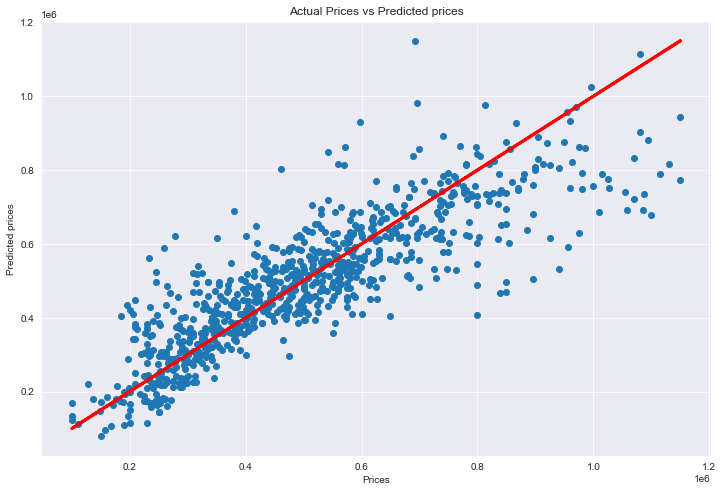

In [51]:
plt.figure(figsize = (12, 8))
plt.scatter(y_test, ride.predict(X_test))
plt.plot(y_test, y_test,color='red', linewidth=3)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [52]:
ride.coef_

array([-1.76212587e+04,  3.66602127e+04,  9.01746109e+01,  3.65900336e-02,
        2.22423557e+04,  1.02527540e+05,  3.87957171e+04,  2.88598668e+04,
        7.43488825e+01,  1.58255383e+01, -4.22010093e+02,  9.68729520e-01,
        4.22010092e+02, -1.17016339e+05, -1.30336747e+05,  1.91936824e+05,
        1.92463374e+05,  8.44248290e+03,  1.19336339e+04, -5.55884899e+04,
       -2.11101146e+04,  3.45988899e+05, -1.36862595e+05, -1.15228520e+05,
       -4.55079201e+04, -1.24622510e+05,  6.97508566e+04, -1.34102690e+05,
        1.84619172e+04,  8.24972440e+04,  1.37082291e+04, -1.21680498e+05,
        1.25736569e+05,  1.03136551e+04, -1.03624198e+05, -2.10385408e+05,
        2.44959196e+05, -1.70991641e+04,  9.14424038e+04,  1.62362859e+04,
       -4.40393379e+04, -9.07256882e+04, -5.59762910e+03, -3.39298870e+04,
        1.51913848e+05, -6.57448962e+04,  1.24030705e+05, -1.01714804e+05,
        1.11410004e+05,  7.32340563e+03, -1.00794587e+05, -1.81670651e+03,
        4.52621238e+04, -

In [53]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=50.02)
lasso.fit(X_train,y_train)
# max ở 50.02

c:\users\qtt15\onedrive - hanoi university of science and technology\project1\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.685e+13, tolerance: 1.518e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50.02)

In [54]:
lasso.score(X_train, y_train)

0.7027243954223522

In [55]:
lasso.score(X_test,y_test)

0.7238931225510363

In [56]:
print_evaluate(y_test,lasso.predict(X_test))

MAE: 79502.71908912643
MSE: 12415199709.056818
RMSE: 111423.51506327925
R2 Square 0.7238931225510363


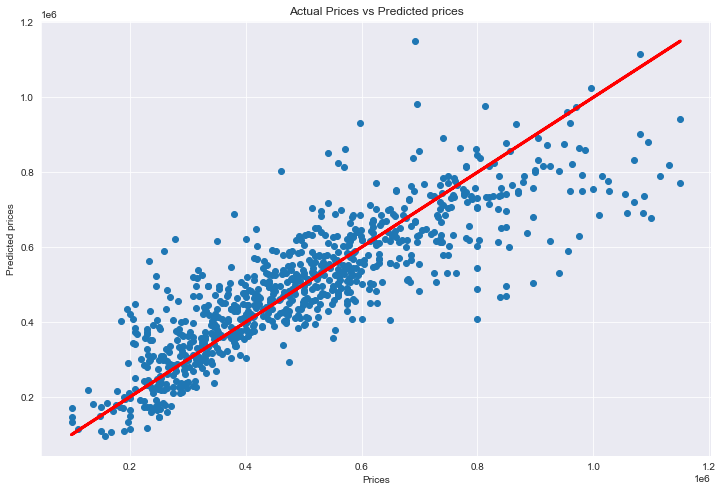

In [57]:
plt.figure(figsize = (12, 8))
plt.scatter(y_test, lasso.predict(X_test))
plt.plot(y_test, y_test,color='red', linewidth=3)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

In [58]:
lasso.coef_

array([-1.76007820e+04,  3.67640555e+04,  1.58795569e+02,  2.73516259e-02,
        2.17852259e+04,  9.32755840e+04,  3.87402746e+04,  2.89493890e+04,
        6.04203907e+00, -5.25760921e+01, -8.43140553e+02,  1.04197812e+00,
        0.00000000e+00, -8.41227522e+04, -1.20026424e+05,  2.30902182e+05,
        2.02440683e+05,  0.00000000e+00,  1.67510678e+04, -4.33866352e+04,
       -1.19344391e+03,  4.16757853e+05, -1.26091755e+05, -1.04021852e+05,
       -3.16861573e+04, -1.11705605e+05,  6.68591294e+04, -1.23913884e+05,
        0.00000000e+00,  9.20198589e+04,  2.08680581e+04, -1.11371464e+05,
        1.35363214e+05,  1.44970302e+04, -9.28064893e+04, -2.48505097e+05,
        2.57213439e+05, -0.00000000e+00,  9.86210794e+04,  1.55508478e+04,
       -3.06616593e+04, -6.86371401e+04,  0.00000000e+00, -0.00000000e+00,
        1.61882242e+05, -5.53224734e+04,  1.33597217e+05, -8.86483517e+04,
        1.21372347e+05,  1.56339378e+04, -5.93773730e+04,  5.10124483e+03,
        0.00000000e+00, -

In [59]:
from sklearn.linear_model import Lasso
r2 = []
model = []
RMSE = []
reg = [LinearRegression(), Lasso(alpha=20), Ridge()]
for tar in reg:
    model_name = type(tar).__name__
    tar.fit(X_train, y_train)
    predict = tar.predict(X_test)
    r2.append(r2_score(y_test, predict))
    model.append(model_name)
    RMSE.append(mean_squared_error(y_test, predict, squared = False))
models = pd.DataFrame({"Model": model, 'R2' : r2, 'RMSE' : RMSE})
print(models)

              Model        R2           RMSE
0  LinearRegression  0.723168  111569.817671
1             Lasso  0.723687  111465.125011
2             Ridge  0.723608  111480.933263


c:\users\qtt15\onedrive - hanoi university of science and technology\project1\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.651e+13, tolerance: 1.518e+10
  model = cd_fast.enet_coordinate_descent(
